# Project
To demonstrate the state-wise Covid19 cases in india. In this project I have fetch the live data from Ministry of Health Affairs Official Website using BeautifulSoup and requests. I have done the analysis of Covid19 cases across the states of India. When we look at the figurs of cases of states we might make wrong assumtions based on highest and lowest figure but the actual scenario is different.

# Importing Modules

In [112]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Extracting Headings

In [113]:
URL = "http://www.mohfw.gov.in/"
response = requests.get(URL)
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find('div', {'class' : 'data-table table-responsive'})
headings = table.find('table', {'border' : '1'}).find('thead').find('tr').find_all('th')
headers = []
for heading in headings:
    headers.append(heading.find('strong').text)
print(headers)

['S. No.', 'Name of State / UT', 'Active Cases*', 'Cured/Discharged/Migrated*', 'Deaths**', 'Total Confirmed cases*']


# Extracting Main Data

In [114]:
rows = []
main_data = table.find('tbody').find_all('tr')
for data in main_data:
    row = []
    row_data = data.find_all('td')
    for data_cell in row_data:
        row.append(data_cell.text)
    rows.append(row)
rows = rows[:-6]            # since last 6 rows are of not use
for row in rows:
    print(row)

['1', 'Andaman and Nicobar Islands', '5', '33', '0', '38']
['2', 'Andhra Pradesh', '2495', '3105', '80', '5680']
['3', 'Arunachal Pradesh', '63', '4', '0', '67']
['4', 'Assam', '1953', '1537', '8', '3498']
['5', 'Bihar', '2480', '3587', '36', '6103']
['6', 'Chandigarh', '43', '286', '5', '334']
['7', 'Chhattisgarh', '873', '550', '6', '1429']
['8', 'Dadra and Nagar Haveli and Daman and Diu', '28', '2', '0', '30']
['9', 'Delhi', '22212', '13398', '1214', '36824']
['10', 'Goa', '394', '69', '0', '463']
['11', 'Gujarat', '5619', '15493', '1415', '22527']
['12', 'Haryana', '3789', '2475', '70', '6334']
['13', 'Himachal Pradesh', '183', '297', '6', '486']
['14', 'Jammu and Kashmir', '2591', '2086', '53', '4730']
['15', 'Jharkhand', '937', '672', '8', '1617']
['16', 'Karnataka', '2997', '3440', '79', '6516']
['17', 'Kerala', '1303', '1000', '19', '2322']
['18', 'Ladakh', '176', '62', '1', '239']
['19', 'Madhya Pradesh', '2802', '7201', '440', '10443']
['20', 'Maharashtra', '49628', '47796', 

# Dataframe Of Above Data

In [115]:
indian_data = pd.DataFrame(rows, columns = headers).set_index('S. No.')
indian_data.head()

,Name of State / UT,Active Cases*,Cured/Discharged/Migrated*,Deaths**,Total Confirmed cases*
S. No.,,,,,
1,Andaman and Nicobar Islands,5,33,0,38
2,Andhra Pradesh,2495,3105,80,5680
3,Arunachal Pradesh,63,4,0,67
4,Assam,1953,1537,8,3498
5,Bihar,2480,3587,36,6103


# Checking Data Type Of Each Column

In [117]:
indian_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 1 to 35
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Name of State / UT          35 non-null     object
 1   Active Cases*               35 non-null     object
 2   Cured/Discharged/Migrated*  35 non-null     object
 3   Deaths**                    35 non-null     object
 4   Total Confirmed cases*      35 non-null     object
dtypes: object(5)
memory usage: 1.6+ KB


# Conversion Of Data Type
Since data type of numeric columns is object, I have changed data type of respective columns into the numeric data type in the below code. So that I can perform arithmatic operations on the columns.

In [118]:
indian_data['Active Cases*'] = pd.to_numeric(indian_data['Active Cases*'])

indian_data['Cured/Discharged/Migrated*'] = pd.to_numeric(indian_data['Cured/Discharged/Migrated*'])

indian_data['Deaths**'] = pd.to_numeric(indian_data['Deaths**'])

indian_data['Total Confirmed cases*'] = pd.to_numeric(indian_data['Total Confirmed cases*'])


# Adding Population Column

In [119]:
indian_data['Population'] = [417036, 53903393, 1570458, 35607039, 124799926, 1158473, 29436231, 615724, 18710922,
                             1586250, 63872399, 28204692, 7451955, 13606320, 38593948, 67562686, 35699443, 289023,
                             85358965, 123144223, 3091545, 3366710, 1239244, 2249695, 46356334, 1413542, 30141373,
                             81032689, 690251, 77841267, 39362732, 4169794, 237882725, 11250858, 99609303]

total_population = sum(indian_data['Population'])

total_population

1371287168

# Calculating Some Rates :
I have calculated following rates :
1. Infection Fatality Rate which shows percent of people had death due to Covid19.
2. Cure Rate which shows the percent of cured people with respect to total cases.
3. Death rate is calculated per million population.
4. Active cases of state per lakh population.
5. Total confirmed cases of state per lakh population.

In [120]:
indian_data['Infection Fatality Rate'] = round(indian_data['Deaths**'] / indian_data['Total Confirmed cases*'] * 100, 2)

indian_data['Cure Rate'] = round(indian_data['Cured/Discharged/Migrated*'] / indian_data['Total Confirmed cases*'] * 100, 2)

indian_data['Death Rate'] = round(indian_data['Deaths**'] / indian_data['Population'] * 1000000, 2)

indian_data['Active Cases Per Lakh Population'] = round(indian_data['Active Cases*'] / indian_data['Population'] * 100000, 2)

indian_data['Confirmed Cases Per Lakh Population'] = round(indian_data['Total Confirmed cases*'] / indian_data['Population'] * 100000, 2)

indian_data.head()

,Name of State / UT,Active Cases*,Cured/Discharged/Migrated*,Deaths**,Total Confirmed cases*,Population,Infection Fatality Rate,Cure Rate,Death Rate,Active Cases Per Lakh Population,Confirmed Cases Per Lakh Population
S. No.,,,,,,,,,,,
1,Andaman and Nicobar Islands,5,33,0,38,417036,0.00,86.84,0.00,1.20,9.11
2,Andhra Pradesh,2495,3105,80,5680,53903393,1.41,54.67,1.48,4.63,10.54
3,Arunachal Pradesh,63,4,0,67,1570458,0.00,5.97,0.00,4.01,4.27
4,Assam,1953,1537,8,3498,35607039,0.23,43.94,0.22,5.48,9.82
5,Bihar,2480,3587,36,6103,124799926,0.59,58.77,0.29,1.99,4.89


# Plotting Bar Graph
I have plotted bar graph using matplotlib.

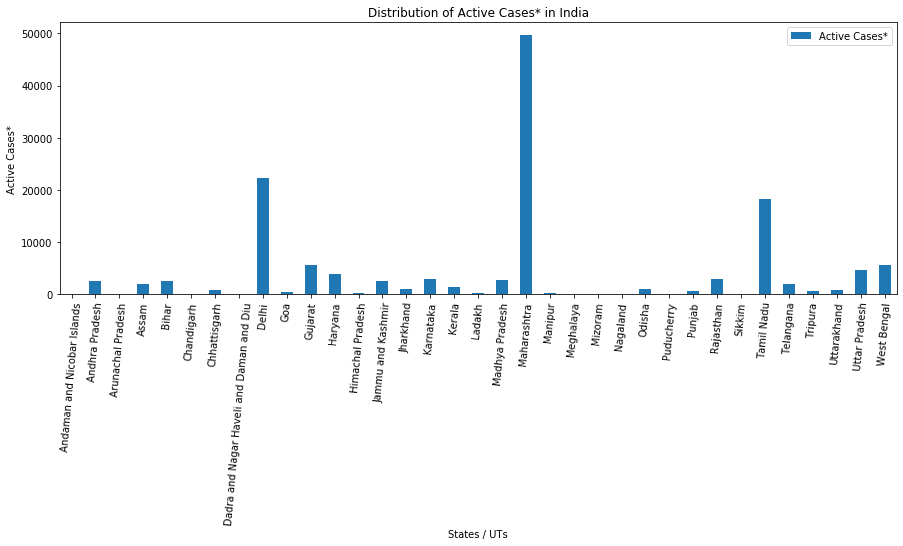

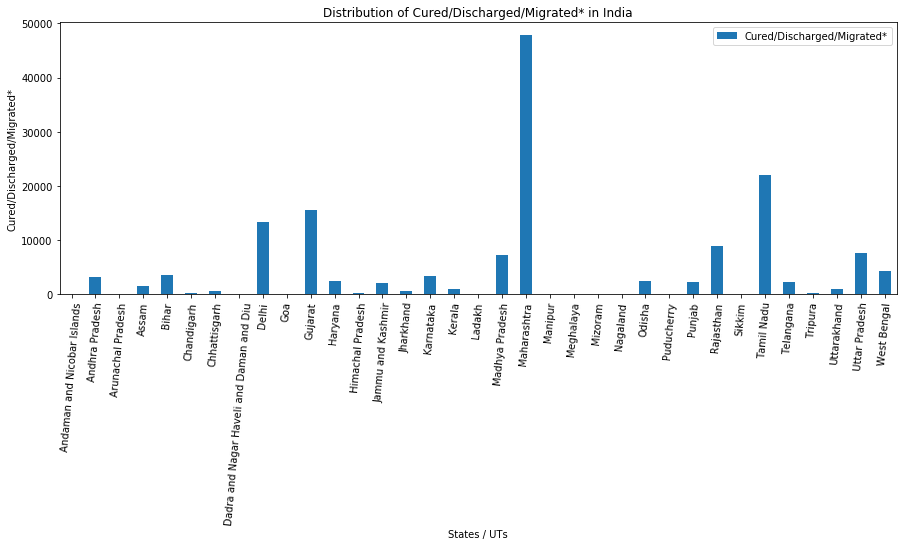

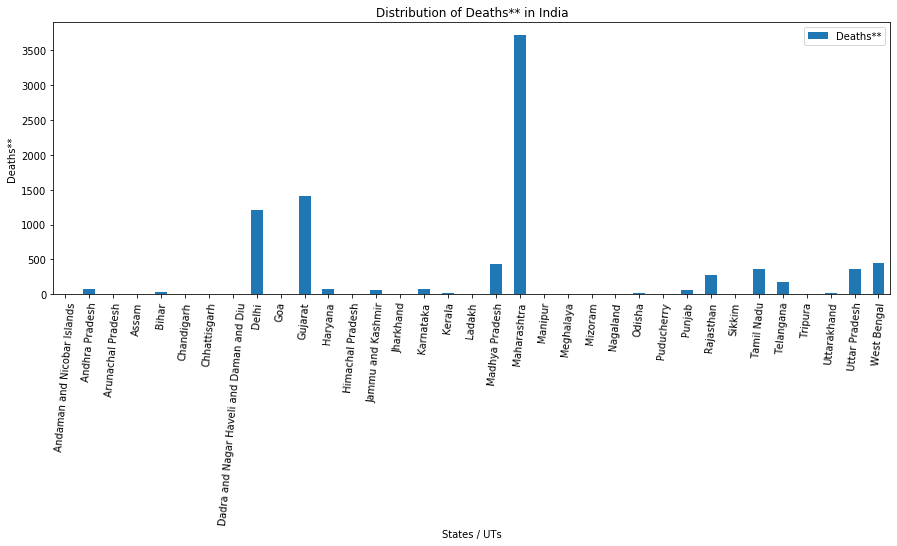

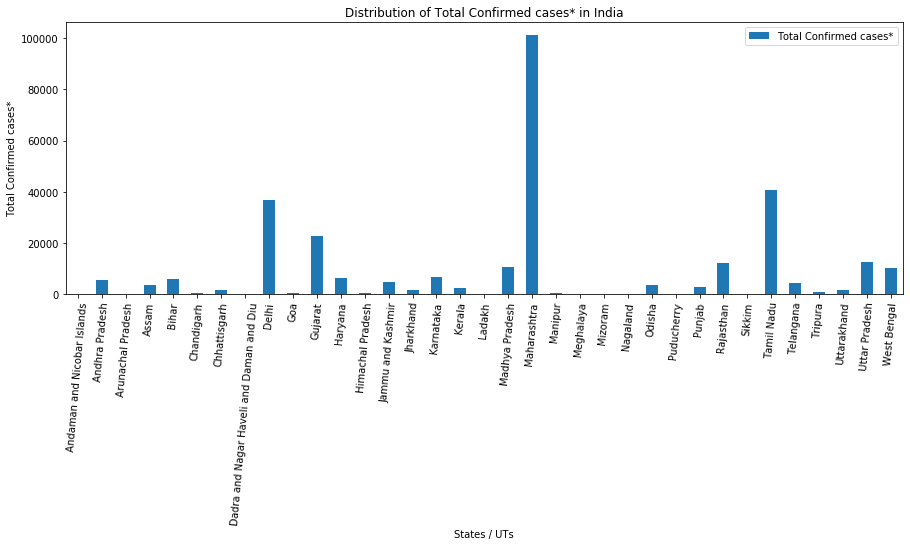

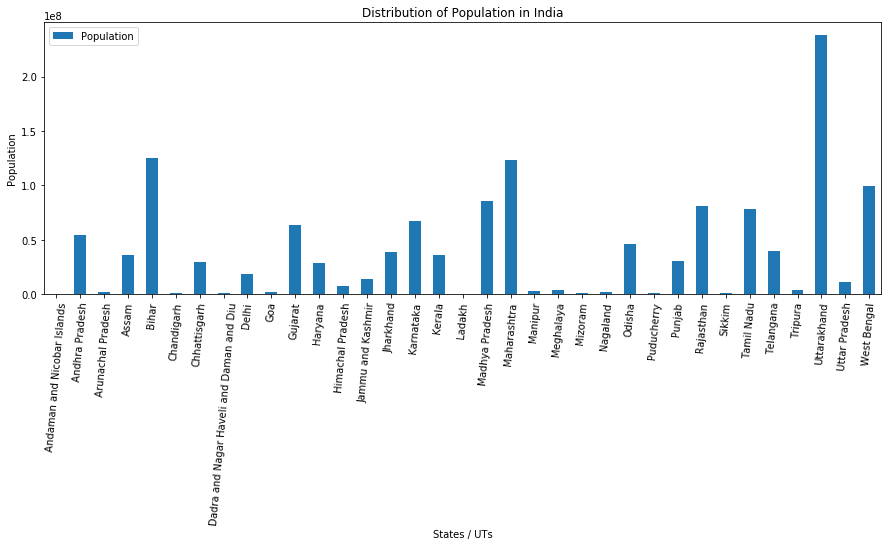

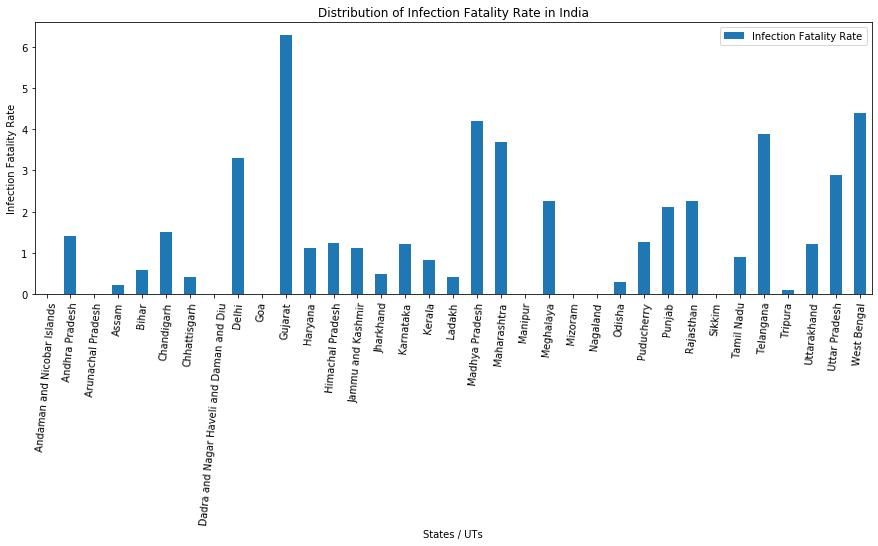

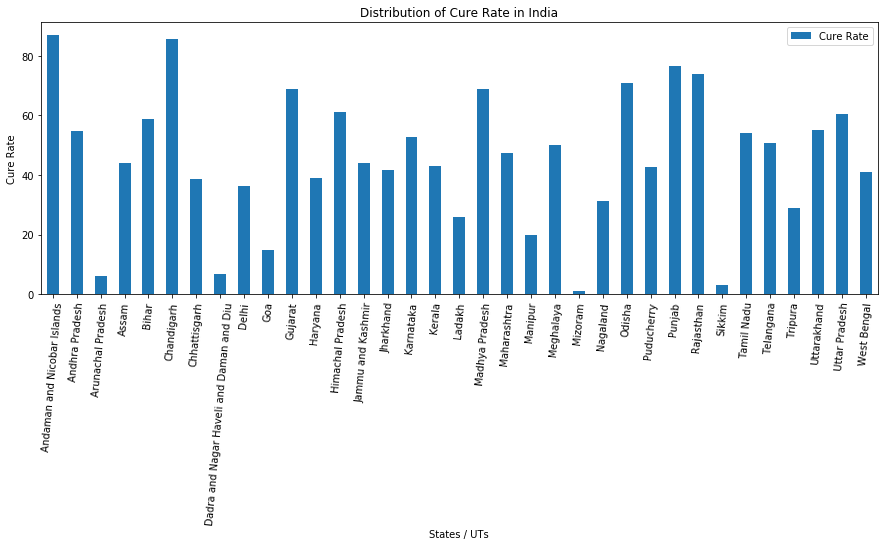

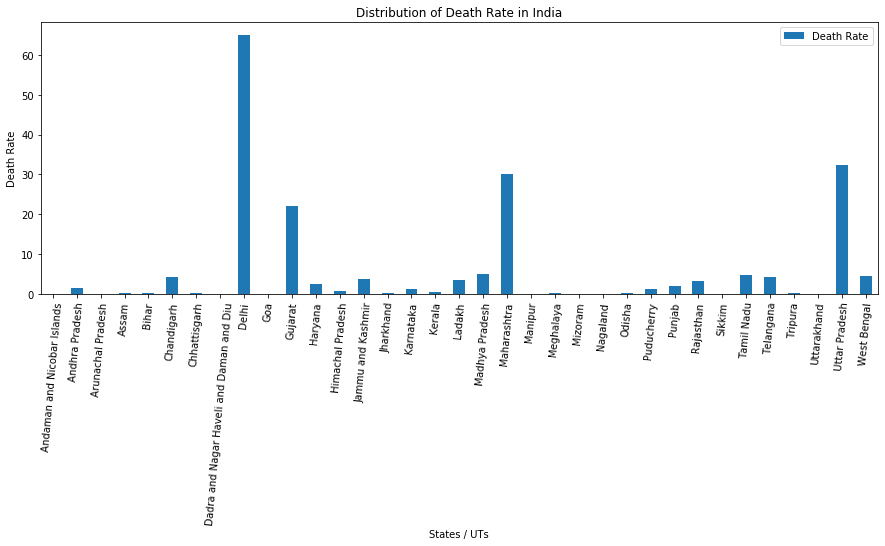

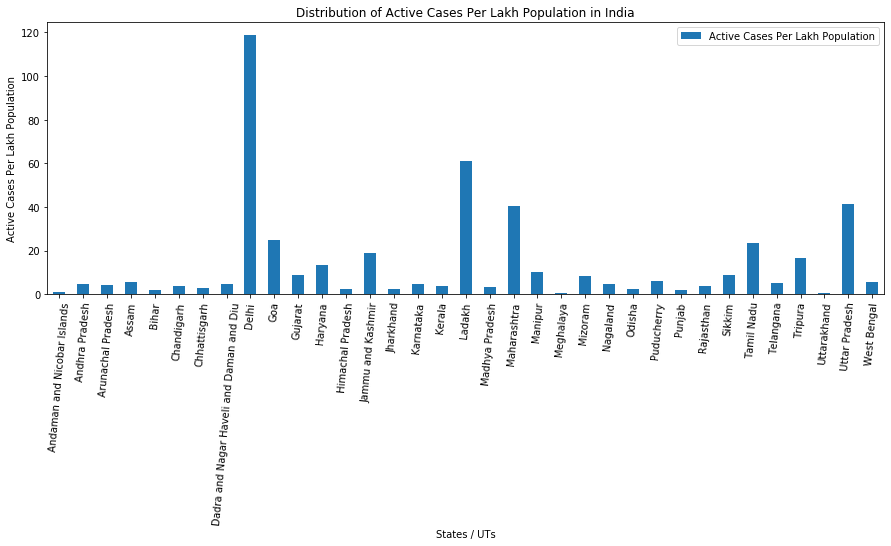

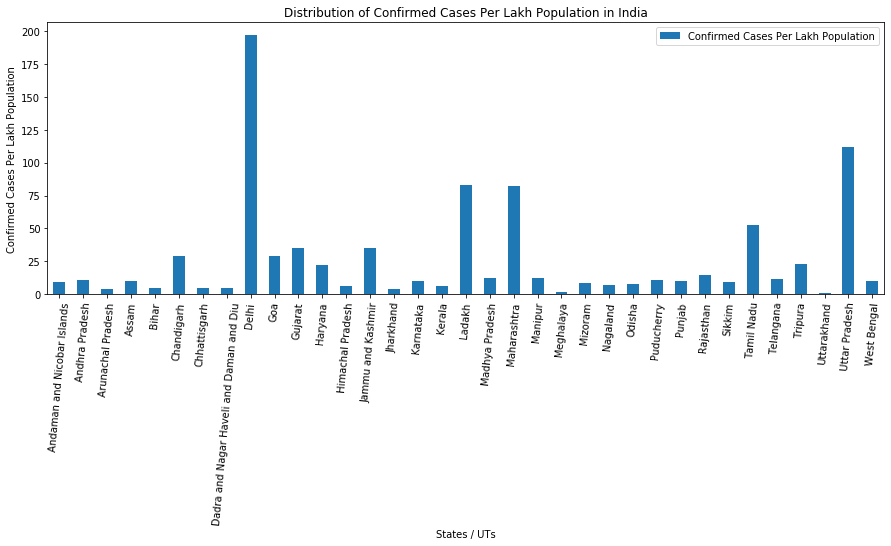

In [121]:
numeric_col =indian_data.select_dtypes(include = np.number).columns

for i in numeric_col:
    indian_data.plot.bar(x = 'Name of State / UT', y = i, rot = 85, title = 'Distribution of ' + i + ' in India', figsize = (15, 5))
    plt.xlabel('States / UTs')
    plt.ylabel(i)

# Observations From Tables:
1. Maharashtra State have the most number of active case. 
2. The states Andaman and Nicobar, Arunachal Pradesh, Chandigarh, Chhattisgarh, Dadra Nagar Haveli and Daman-Diu, Goa, Himachal Pradesh, Ladakh, Manipur, Meghalaya, Mizoram, Nagaland, Puducherry, Punjab, Sikkim, Tripura, Uttarakhand have the less number of active cases.
3. Maharashtra have the most number of cured/migrated/discharged cases.
4. Maharashtra have the most number of death cases.
5. The states Andaman and Nicobar, Arunachal Pradesh, Assam, Chandigarh, Chhattisgarh, Dadra Nagar Haveli and Daman-Diu, Goa, Himachal Pradesh, Jharkhand, Kerala, Ladakh, Manipur, Meghalaya, Mizoram, Nagaland, Odisha, Puducherry, Punjab, Sikkim, Tripura, Uttarakhand have the less number of deaths till now.
6. Gujarat have the highest infection fatality rate due to covid19.
7. The states Andaman and Nicobar, Arunachal Pradesh, Dadra Nagar Haveli and Daman-Diu, Goa, Manipur, Mizoram, Nagaland, Sikkim, Tripura have the less infection fatality rate due to covid19.
8. Andaman and Nicobar have the highest cure rate.
9. Mizoram and Sikkim have the least cure rate.
10. Delhi have the highest death rate.
11. The states Andaman and Nicobar, Arunachal Pradesh, Dadra Nagar Haveli and Daman-Diu, Goa, Manipur, Mizoram, Nagaland, Sikkim, Uttarakhand have the least death rate.
12. Delhi have the highest active cases per lakh state population.
13. The States Andaman and Nicobar, Meghalaya, Uttarakhand have the least active cases per lakh state population.
14. The states Meghalaya, Uttarakhand have the least total confirmed cases per lakh state population.

# Percentage Of Cases in India

In [123]:
total_active = sum(indian_data['Active Cases*'])

total_cured = sum(indian_data['Cured/Discharged/Migrated*'])

total_death = sum(indian_data['Deaths**'])

total_cases = sum(indian_data['Total Confirmed cases*'])

perc_active = total_active / total_population * 100

perc_cured = total_cured / total_population * 100

perc_death = total_death / total_population * 100

perc_cases = total_cases / total_population * 100

perc_normal = 100 - perc_cases

print(perc_active, perc_cured, perc_death, perc_normal, sep = ', ')

0.010048588159763193, 0.011254389569260522, 0.0006478584651934845, 99.97804916380578


# Conclusion :
1. Inspite of Maharashtra having most number of confirmed cases, it have comparatively less death rate and high cure rate.
2. Inspite of Gujarat having comparatively less number of confirmed cases, it have highest infection fatality rate.
3. Inspite of Delhi having comparatively less number of confirmed cases, it have highest death rate due to covid19 and highest active cases per lakh population.
4. Inspite of Mizoram and Sikkim having comparatively less number of confirmed cases, it have least cure rate.
5. North-east states of India have comparatively less active cases.
6. Large states have the most number of active cases and small states have the least number of active cases. There are some exceptions.
7. The states Gujarat, Delhi, Maharashtra have to be more careful. 
8. The states Mizoram and Sikkim have to focus on its cure rate.